# Data Exploration

In this notebook I take a look at some basic relationships in the data of the cricket set. The data is accumulated from files within the subfolder test_csv_male and saved to csv files in the subfolder processed_data.

The aim of this project is to perform some simple data exploration of the three processed csv files, match_information, batting_stats and bowling_stats. These dataframes were generated by the data procesing project.

The project will be broken down into several sections.
    1. Describing the data and looking at column names
    2. A more detailed look at match_information
    3. A more detailed look at batting_stats
    4. A more detailed look at bowling_stats
    5. Joining datasets to look at more complex problems
    6. Summary
Note that this project is not inteded to thouroughly explore all possible trends within the data. I have explored some relatively simple questions that hopefully reveal general bowling and batting trends. 

In [1]:
%matplotlib inline
import matplotlib

#basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

sns.set(style="whitegrid")

In [31]:
## load in the data

match_information = pd.read_csv(r'processed_data/match_information.csv')
batting_stats = pd.read_csv(r'processed_data/batting_stats.csv')
bowling_stats = pd.read_csv(r'processed_data/bowling_stats.csv')

ball_by_ball_stats = pd.read_csv(r'processed_data/ball_by_ball_stats.csv')

## 1. Describing data

In this section I look at the description of each dataframe and also their column names.

In [3]:
print('match_information describe')
display(match_information.columns)
display(match_information.describe())

print('batting_stats describe')
display(batting_stats.columns)
display(batting_stats.describe())

print('bowling_stats describe')
display(bowling_stats.columns)
display(bowling_stats.describe())

match_information describe


Index(['Unnamed: 0', 'match_id', 'home_team', 'away_team', 'gender', 'season',
       'competition', 'match_number', 'venue', 'city', 'toss_winner',
       'toss_decision', 'umpire', 'umpire_2', 'reserve_umpire',
       'match_referee', 'winner', 'winner_wickets', 'start_date', 'end_date',
       'winner_runs', 'series', 'player_of_match', 'tv_umpire', 'neutralvenue',
       'outcome', 'method', 'player_of_match_2', 'reserve_umpire_2',
       'eliminator', 'match_number_2'],
      dtype='object')

,Unnamed: 0,match_id,match_number,winner_wickets,winner_runs,match_number_2
count,1447.000000,1.447000e+03,1380.000000,694.000000,679.000000,1.0
mean,723.000000,5.779328e+05,6.061594,5.678674,73.942563,2.0
std,417.857232,2.741101e+05,8.779127,2.259290,55.913159,NaN
min,0.000000,2.251710e+05,1.000000,1.000000,1.000000,2.0
25%,361.500000,3.504125e+05,2.000000,4.000000,28.000000,2.0
50%,723.000000,5.212190e+05,3.000000,6.000000,63.000000,2.0
75%,1084.500000,7.451600e+05,5.000000,7.000000,106.500000,2.0
max,1446.000000,1.199225e+06,51.000000,10.000000,275.000000,2.0


batting_stats describe


Index(['Unnamed: 0', 'index', 'batsman', 'innings', 'runs', 'balls_faced',
       'zeros', 'ones', 'twos', 'threes', 'fours', 'fives', 'sixes',
       'dismissal_type', 'strike_batsman_x', 'offstrike_batsman', 'bowler',
       'out', 'batting_pos', 'strike_batsman_y', 'batting_team', 'match_id'],
      dtype='object')

,Unnamed: 0,index,innings,runs,balls_faced,zeros,ones,twos,threes,fours,fives,sixes,batting_pos,match_id
count,25141.000000,25141.000000,25141.000000,25141.000000,25141.000000,25141.000000,25141.000000,25141.000000,25141.000000,25141.000000,25141.000000,25141.000000,25141.000000,2.514100e+04
mean,12570.000000,8.520186,1.465614,24.341275,30.664810,16.989579,9.269560,1.566724,0.202180,2.241836,0.005250,0.389642,5.234676,5.793063e+05
std,7257.725895,5.455093,0.499464,27.954458,30.366491,16.202558,11.253915,2.162247,0.522878,2.918637,0.072819,0.955557,2.948264,2.745530e+05
min,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.251710e+05
25%,6285.000000,4.000000,1.000000,4.000000,8.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.504790e+05
50%,12570.000000,8.000000,1.000000,14.000000,20.000000,12.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000,5.000000,5.212210e+05
75%,18855.000000,13.000000,2.000000,35.000000,44.000000,25.000000,13.000000,2.000000,0.000000,3.000000,0.000000,0.000000,8.000000,7.451610e+05
max,25140.000000,22.000000,4.000000,264.000000,176.000000,105.000000,77.000000,20.000000,6.000000,33.000000,2.000000,17.000000,11.000000,1.199225e+06


bowling_stats describe


Index(['Unnamed: 0', 'index', 'bowler', 'innings', 'runs', 'deliveries',
       'wickets', 'bowled', 'lbw', 'caught', 'c_and_b', 'stumped',
       'bowling_team', 'match_id'],
      dtype='object')

,Unnamed: 0,index,innings,runs,deliveries,wickets,bowled,lbw,caught,c_and_b,stumped,match_id
count,17409.000000,17409.000000,17409.000000,17409.000000,17409.000000,17409.000000,17409.000000,17409.000000,17409.000000,17409.000000,17409.000000,1.740900e+04
mean,8704.000000,5.648458,1.486415,35.152163,44.284221,1.105290,0.217244,0.129243,0.688782,0.035327,0.031478,5.783748e+05
std,5025.689754,3.631417,0.500289,16.626603,17.181970,1.172506,0.496795,0.379053,0.899085,0.188306,0.183591,2.730419e+05
min,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.251710e+05
25%,4352.000000,3.000000,1.000000,23.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.504810e+05
50%,8704.000000,6.000000,1.000000,35.000000,49.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.212210e+05
75%,13056.000000,9.000000,2.000000,46.000000,60.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,7.451590e+05
max,17408.000000,15.000000,4.000000,110.000000,74.000000,7.000000,4.000000,4.000000,6.000000,2.000000,3.000000,1.199225e+06


### 1.1 Results

By calling .describe() on these dataframes we can try and get some intuition into the data, as well as getting a general sense of whether it lies within a reasonable range. 

For example the average number of runs in batting_stats is 28.30. In test cricket batsmen typically have averages of around 40, while bowlers have averages of around 15 (very rough estimates). A total average falling between these two limits seems reasonable. Also keep in mind that batsmen who are not dismissed contribute to this average as if they were dismissed, which will result in a lower than actual average being returned by the .describe() method.

Similarly the average number of wickets taken by bowlers is 1.55. There are 10 possible wickets in an innings, and most teams run with 4 or 5 bowlers in the attack. If each bowler takes 1.6 wickets and there are 4.5 bowlers in a team this results in 7.2 wickets attributed to bowlers. This seems too low, since it is uncommon for there to be 3 runouts in an innings. This discrepancy is likely explained becuase the final innings of a match may not result in 10 wickets. This can occur becuase the number of days to play has expired, or the batting team wins and no further play is required.

In both of these examples the results fall within a realistic range. To verify in more detail an innings by innings comparison will be more useful.

## 2.  The match_information dataset

I will briefly explore some simple elements of the match_information dataset. 

For example if a team wins the toss how likely are they to win the game as opposed to losing?

How likely is it that the home team wins a match?

Note that there is the possibility that the match ends in a draw or a tie, and we need to factor this in when checking how many losses a team suffers.

Team wins the toss: 678 wins, 769 losses and 0 inconclusive
Team plays at home: 790 wins, 583 losses and 0 inconclusive
Team plays at home and wins toss: 386 wins, 327 losses and 0 inconclusive


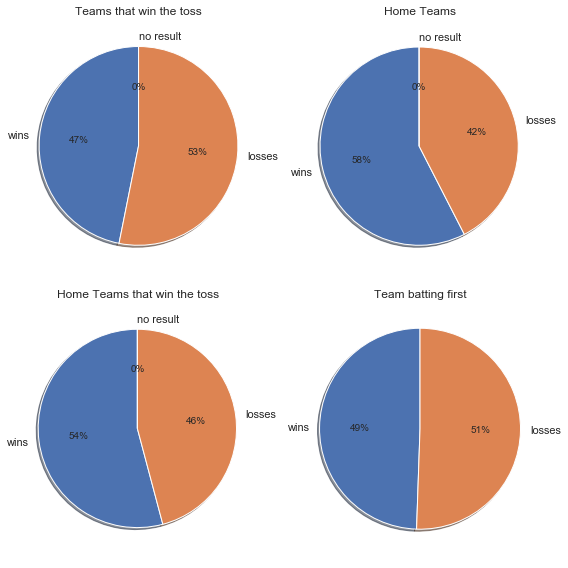

In [11]:
#calculate wins when the toss is won

wins_toss = np.sum(match_information['toss_winner'] == match_information['winner'])
not_wins = np.sum(match_information['toss_winner'] != match_information['winner'])
draws = np.sum(match_information['winner']=='draw')
ties = np.sum(match_information['winner']=='tie')
no_result = draws+ties
losses_toss = not_wins - no_result

print("Team wins the toss: %d wins, %d losses and %d inconclusive"%(wins_toss,losses_toss,no_result))

#calculate wins by home team

wins_home = np.sum(match_information['home_team'] == match_information['winner'])
losses_home = np.sum(match_information['away_team'] == match_information['winner'])

print("Team plays at home: %d wins, %d losses and %d inconclusive"%(wins_home,losses_home,no_result))

#calculate wins by home team when the toss is won

wins_home_toss = np.sum((match_information['home_team']==match_information['winner']) & (match_information['toss_winner'] == match_information['home_team']))
not_wins_home_toss = np.sum((match_information['home_team']!=match_information['winner']) & (match_information['toss_winner'] == match_information['home_team']))
draws_home_toss = np.sum((match_information['home_team']==match_information['toss_winner']) & (match_information['winner'] == 'draw'))
ties_home_toss= np.sum((match_information['home_team']==match_information['toss_winner']) & (match_information['winner'] == 'tie'))
no_result_home_toss = draws_home_toss + ties_home_toss

losses_home_toss = not_wins_home_toss - no_result_home_toss

print("Team plays at home and wins toss: %d wins, %d losses and %d inconclusive"%(wins_home_toss,losses_home_toss,no_result_home_toss))



#calculate the number of teams who win when batting first
wins_batting_first = np.sum(~pd.isna(match_information['winner_runs']))
wins_batting_second = np.sum(~pd.isna(match_information['winner_wickets']))


#make some nice simple plots to display the results

fig, ax1 = plt.subplots(2,2, figsize=(8,8))

#plot toss results
ax1[0,0].pie([wins_toss,losses_toss,no_result],labels=['wins','losses','no result'],autopct='%1.f%%',shadow=True,startangle=90)
ax1[0,0].axis('equal')
ax1[0,0].title.set_text('Teams that win the toss')


#plot home team results
ax1[0,1].pie([wins_home,losses_home,no_result],labels=['wins','losses','no result'],autopct='%1.f%%',shadow=True,startangle=90)
ax1[0,1].axis('equal')
ax1[0,1].title.set_text('Home Teams')

#plot home team wins toss results
ax1[1,0].pie([wins_home_toss,losses_home_toss,no_result_home_toss],labels=['wins','losses','no result'],autopct='%1.f%%',shadow=True,startangle=90)
ax1[1,0].axis('equal')
ax1[1,0].title.set_text('Home Teams that win the toss')

#plot winner batting first and second
ax1[1,1].pie([wins_batting_first,wins_batting_second], labels=['wins','losses'],autopct='%1.f%%',shadow=True,startangle=90)
ax1[1,1].axis('equal')
ax1[1,1].title.set_text('Team batting first')

plt.tight_layout()
plt.show()

### 2.1 Results

Interestingly the team that wins the toss is actually slightly less likely to win the match.

There is a moderate advantage to the home teams chances of winning.

Interestingly there seems to be no significant advantage to batting first or second. Intuitively I thought that the team batting second had an advantage becuase they know the target score in advance and can bat more or less agressively as required, but this does not seem to be a significant factor.

## 3. The batting_stats dataset

I will briefly explore some simple elements of the batting_stats dataset.

For example, how does the position in the batting order affect the average number of runs scored?

Another example. Has any batsman since 2009 got a diamond duck (0 balls faced and out)?

Another example. Slice out a players batting history and plot a histogram. Try to highlight 50's, 100's, 150's, 200's with special colours?

There have been 0 diamond ducks in ODI cricket since 2009
There have been 2359 ducks in the same period


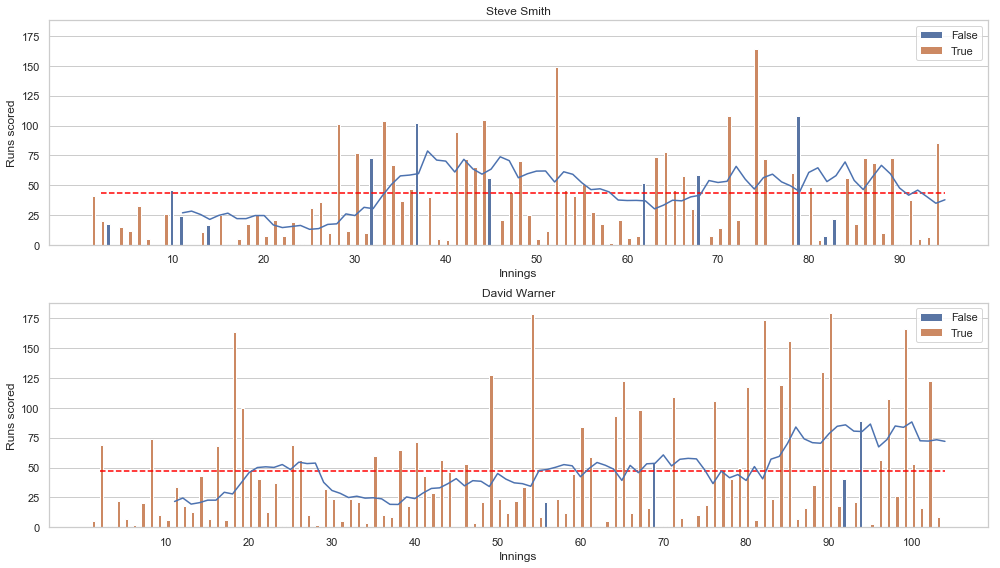

In [21]:
# ####Calculate the average number of runs scored by batting position.
#     #keep in mind batsmen are sometimes not out.

# runs_by_pos = batting_stats[['runs','batting_pos','out']].groupby('batting_pos').agg('sum')
# runs_by_pos['average'] = runs_by_pos['runs'] / runs_by_pos['out']
# runs_by_pos = runs_by_pos.reset_index()

# #plot a bar graph of the result
# fig, ax0 = plt.subplots(1,1, figsize=(10,10))
# sns.barplot(x = runs_by_pos['batting_pos'], y = runs_by_pos['average'])
# fig.suptitle('Average number of runs scored by batting position \n (Both innings)')
# plt.xlabel('Batting position')
# plt.ylabel('Runs scored')


# #does this change if we plot a teams first and second innings only?

# first_innings = batting_stats.loc[batting_stats['innings'] < 3, ['runs','batting_pos','out']]
# first_innings = first_innings[['runs','batting_pos','out']].groupby('batting_pos').agg('sum')
# first_innings['average'] = first_innings['runs'] / first_innings['out']
# first_innings = first_innings.reset_index()

# second_innings = batting_stats.loc[batting_stats['innings'] > 2, ['runs','batting_pos','out']]
# second_innings = second_innings[['runs','batting_pos','out']].groupby('batting_pos').agg('sum')
# second_innings['average'] = second_innings['runs'] / second_innings['out']
# second_innings = second_innings.reset_index()

# #plot bar graphs of the results
# fig, ax1 = plt.subplots(1,2, figsize=(10,6),sharey='row') #set shared axis ticks
# sns.barplot(x = first_innings['batting_pos'], y = first_innings['average'],ax=ax1[0])
# ax1[0].set_title('Runs scored by position, first innings')
# ax1[0].set_ylabel('Runs scored')
# ax1[0].set_xlabel('Batting position')

# sns.barplot(x = second_innings['batting_pos'], y=second_innings['average'],ax=ax1[1])
# ax1[1].set_title('Runs scored by position, second innings')
# ax1[1].set_ylabel('Runs scored')
# ax1[1].set_xlabel('Batting position')



#### Has any batsman got a diamond duck since 2009 (beginnning of the dataset)

ducks = batting_stats.loc[batting_stats['runs'] == 0]
tot_ducks = ducks.shape[0]
diamonds = ducks.loc[ducks['balls_faced'] == 0]
dducknumber = diamonds.shape[0]

print("There have been %d diamond ducks in ODI cricket since 2009"%(dducknumber))
print("There have been %d ducks in the same period"%(tot_ducks))



#### Generate batting bar plot for Steve Smith and David Warner

smith = batting_stats.loc[batting_stats['batsman'] == 'SPD Smith']
warner = batting_stats.loc[batting_stats['batsman'] == 'DA Warner']

#to sort the career scores of a player we need to get the date of each match from the 
# match_information dataframe. This can be joined on match_id

match_dates = match_information[['start_date','match_id']]

smith = pd.merge(smith, match_dates, how='left', on='match_id')
warner = pd.merge(warner, match_dates, how='left', on='match_id')

# #sort 'smith' and 'warner' first on date and then by innings. This will generate a sorted column
# #of run scores. Note that the hue of each score can be modified if the batsman is not out. Note that the final 
# #two games of the ashes series were not present in the dataset when retrieved 2019/09/25 and have been added manually

smith = smith.sort_values(by = ['start_date', 'innings'])
smith.reset_index(inplace=True, drop=True)
smith['index'] = list(range(1,1+smith.shape[0]))
# smith = smith[['innings','runs','out','index']]
# #manually add last two matches in 2019 ashes campaign
# df2 = pd.DataFrame([[1, 211, 1, 104], [3, 82, 1, 105], [1, 80, 1, 106], [3, 23, 1, 107]], columns=('innings','runs','out','index'))
# smith = smith.append(df2)


warner = warner.sort_values(by = ['start_date', 'innings'])
warner.reset_index(inplace=True, drop=True)
warner['index'] = list(range(1,1+warner.shape[0]))
# warner = warner[['innings','runs','out','index']]
# #manually add last two matches in 2019 ashes campaign
# df2 = pd.DataFrame([[1, 0, 1,126], [3, 0, 1,127], [1, 5, 1,128], [3, 11, 1,129]], columns=('innings','runs','out','index'))
# warner = warner.append(df2)


#generate rolling averages for 'smith' and 'warner'
smith['roll_av'] = smith.runs.rolling(10, center=False).sum() / smith.out.rolling(10, center=False).sum()
warner['roll_av'] = warner.runs.rolling(10, center=False).sum() / warner.out.rolling(10, center=False).sum()
smith_mean = smith.runs.sum() / smith.out.sum()
warner_mean = warner.runs.sum() / warner.out.sum()

#plot bar graphs of the results
fig, ax2 = plt.subplots(2,1, figsize=(14,8),sharey=True) #set shared axis ticks 

#plot an average
x= smith['index']
x= [x.iloc[0], x.iloc[-1]]
y= [smith_mean,smith_mean]
ax2[0].plot(x,y,color='red',linestyle='--')


plot_ = sns.barplot(x = 'index', y = 'runs', hue='out', data = smith, ax=ax2[0])
x = smith['index']
ax2[0].plot(x=[x.iloc[0], x.iloc[-1]], y= [smith_mean,smith_mean])
plot_roll_av = sns.lineplot(x='index', y='roll_av', data=smith, ax=ax2[0])
ax2[0].set_title('Steve Smith')
ax2[0].set_ylabel('Runs scored')
ax2[0].set_xlabel('Innings')
for label in plot_.get_xticklabels():
    if np.int(label.get_text()) % 10 == 0:  
        label.set_visible(True)
    else:
        label.set_visible(False)


#plot an average
x= warner['index']
x= [x.iloc[0], x.iloc[-1]]
y= [warner_mean,warner_mean]
ax2[1].plot(x,y,color='red',linestyle='--')


plot2_ = sns.barplot(x = 'index', y = 'runs', hue='out', data = warner, ax=ax2[1])
plot2_roll_av = sns.lineplot(x='index', y='roll_av', data=warner, ax=ax2[1])
ax2[1].set_title('David Warner')
ax2[1].set_ylabel('Runs scored')
ax2[1].set_xlabel('Innings')
for label in plot2_.get_xticklabels():
    if np.int(label.get_text()) % 10 == 0:  
        label.set_visible(True)
    else:
        label.set_visible(False)        

fig.tight_layout(h_pad=1.0)



### 3.1 Results

In the previous cell i addressed two simple questions that may be asked about the data. 

__Diamond ducks__

The query that was generated searches for any batsman who has been dismissed ('out' = True) with the number of 'balls_faced' equal to zero. This is an incredibly rare event which occurs when the non-strike batsman is run out without facing a ball, and has not occured since 2009.

__Steve Smith and David Warner batting history__

I have generated the batting history for Steve Smith and David Warner. The graph shows a bar plot of the number of runs scored in each innings, with 'not out' innings shaded blue. Their overal average is overlaid with a dashed red line. 

I have also overlaid the bar plots with a rolling average of 10 innings. This produces a smoothed function of batting performance. There are a few periods where Steve Smith has achieved a 10 innings average of over 100 runs.


## 4. The bowling_stats dataset

I will briefly explore some simple elements of the batting_stats dataset.


What is the breakdown of bowling wickets in terms of bowled, lbw, caught, caught and bowled and stumped?

How does this vary by bowler? Who tops each category as a fraction of wickets taken.




Text(0, 0.5, 'Run rate')

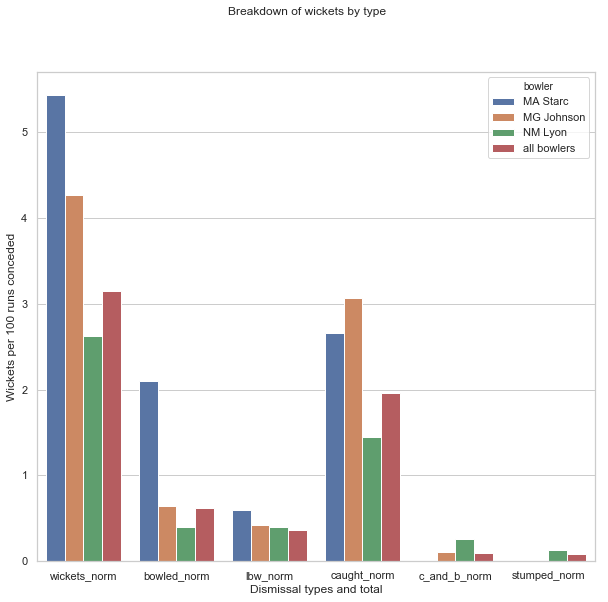

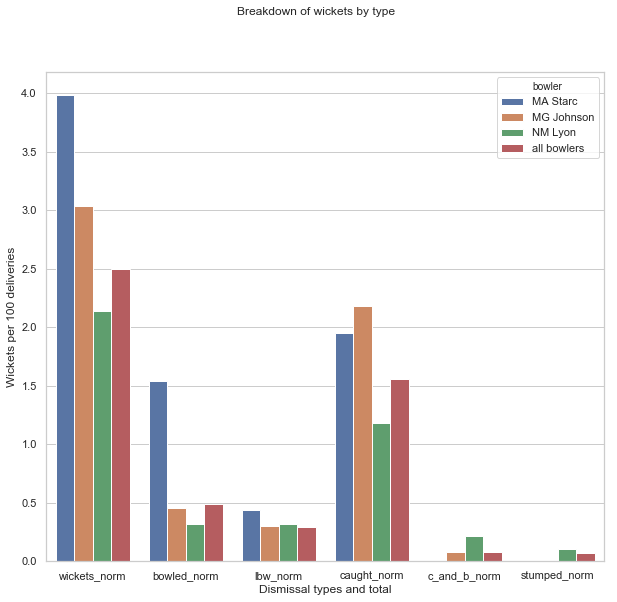

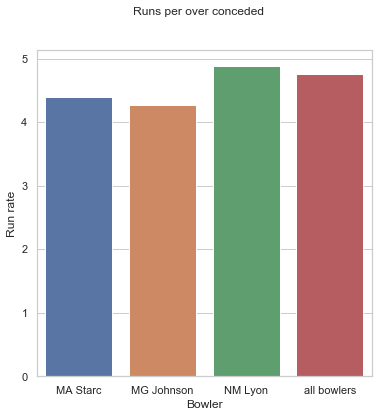

In [22]:
#In this cell I want to explore the bowling performance of three Australian bowlers, 
# Nathan Lyon, Michtell Stark and Mitchell Johnson. Their performance can be broken down
# in a few ways, including wickets taken per balls delivered, or run rate conceded.

#groupby bowler name

bowlers = bowling_stats.groupby(['bowler'])['bowler','runs','deliveries','wickets','bowled','lbw','caught','c_and_b','stumped'].agg('sum')
bowlers.reset_index(inplace=True)


lyon = bowlers.loc[bowlers['bowler'] == 'NM Lyon']
starc = bowlers.loc[bowlers['bowler'] == 'MA Starc']
johnson = bowlers.loc[bowlers['bowler'] == 'MG Johnson']

trio = bowlers.loc[bowlers['bowler'].isin(['NM Lyon', 'MA Starc', 'MG Johnson'])]
total = bowlers.sum()
total['bowler'] = 'all bowlers'


total = pd.DataFrame(total).transpose()

#append total to trio.
trio = pd.concat([trio, total],axis=0,ignore_index=False,sort=False)




#wickets by runs conceded

trio_by_runs = trio
trio_by_runs[['wickets_norm','bowled_norm','lbw_norm','caught_norm','c_and_b_norm','stumped_norm']] = 100*trio[['wickets','bowled','lbw','caught','c_and_b','stumped']].div(trio.runs, axis=0)

# reshape trio
trio_by_runs = pd.melt(trio_by_runs, id_vars=['bowler'], value_vars=['wickets_norm','bowled_norm','lbw_norm','caught_norm','c_and_b_norm','stumped_norm'])

#plot a bar graph of the result
fig, ax5 = plt.subplots(1,1, figsize=(10,9))
sns.barplot(x='variable', y='value',hue='bowler',data=trio_by_runs)
fig.suptitle('Breakdown of wickets by type')
plt.xlabel('Dismissal types and total')
plt.ylabel('Wickets per 100 runs conceded')




#wickets by overs bowled

trio_by_balls = trio
trio_by_balls[['wickets_norm','bowled_norm','lbw_norm','caught_norm','c_and_b_norm','stumped_norm']] = 100*trio[['wickets','bowled','lbw','caught','c_and_b','stumped']].div(trio.deliveries, axis=0)

# reshape trio
trio_by_balls = pd.melt(trio_by_balls, id_vars=['bowler'], value_vars=['wickets_norm','bowled_norm','lbw_norm','caught_norm','c_and_b_norm','stumped_norm'])

#plot a bar graph of the result
fig, ax6 = plt.subplots(1,1, figsize=(10,9))
sns.barplot(x='variable', y='value',hue='bowler',data=trio_by_balls)
fig.suptitle('Breakdown of wickets by type')
plt.xlabel('Dismissal types and total')
plt.ylabel('Wickets per 100 deliveries')



# runs by overs bowled

runs_per_over = trio
runs_per_over['run_rate'] = 6*trio[['runs']].div(trio.deliveries, axis=0)


#plot a bar graph of the run rate per over
fig, ax6 = plt.subplots(1,1, figsize=(6,6))
sns.barplot(y='run_rate',x='bowler',data=runs_per_over)
fig.suptitle('Runs per over conceded')
plt.xlabel('Bowler')
plt.ylabel('Run rate')

### 4.1 Results

In the above cells I broke down bowling performance in terms of number of wikets per ball, number of wikets per delivery, and number of runs per delivery. This was further broken down into four categories. Average for all bowlers, Mitchell Starc, Mitchel Johnson and Nathan Lyon. This allows us to compare thse bowlers against the average of all bowlers.

Nathan Lyon performs close to the average in terms of wikets per 100 runs and wickets per 100 deliveries while Mitchell Starc and Mitchell Johnson both perform better than the average. Interestingly all three concede more runs per over than the average. This could be the result of a more aggressive approach to bowling which takes more wickets, but also allows the batsman opportunities to score. Another possibility is that the pitches in Australia are more conductive to scoring, which skews the run rates for these bowlers.

## 5. Joining Data Sets

The examples above use information from 'match_information', 'batting_stats' and 'bowling_stats' individualy. Often certain questions will require the joining of these dataframes to answer more complicated questions. For example

__(combining batting_stats with match_information)__
What is a players average at home vs away?

__(combining batting_stats with bowling_stats)__
How many players have scored a century and taken a 5 wicket innings in a single match?

__(combining bowling_stats with match_information)__
How often does a player who takes 5 wickets in a match recieve the man of the match award?

__(combining bowling_stats, batting_stats and match_information)__
What does the distribution of player of the match awards look like in terms of number of runs and number of wickets taken? The goal here is to create a simple plot not find complex relationships.

Steve Smiths average for home matches is 54.48 and for away matches is 27.97

Players who have scored 100 runs and taken 5 wickets


,batsman,runs,innings_x,match_id,bowler,innings_y,wickets
23327,Rohan Mustafa,109.0,1.0,1089183,Rohan Mustafa,2.0,5.0


There have been 189 players who have taken 5 wickets in a match.
Of these 115 (or 60.85%) went on to be awarded the player of the match.


,match_id,bowler,wickets,batsman,runs,player_of_match,player_of_match_2
0,225171,D Langford-Smith,3.0,D Langford-Smith,12.0,ME Trescothick,NaN
1,225171,DT Johnston,0.0,DT Johnston,5.0,ME Trescothick,NaN
2,225171,G Chapple,0.0,G Chapple,14.0,ME Trescothick,NaN
3,225171,IR Bell,2.0,IR Bell,80.0,ME Trescothick,NaN
4,225171,JF Mooney,3.0,JF Mooney,30.0,ME Trescothick,NaN


Text(0, 0.5, 'Runs scored')

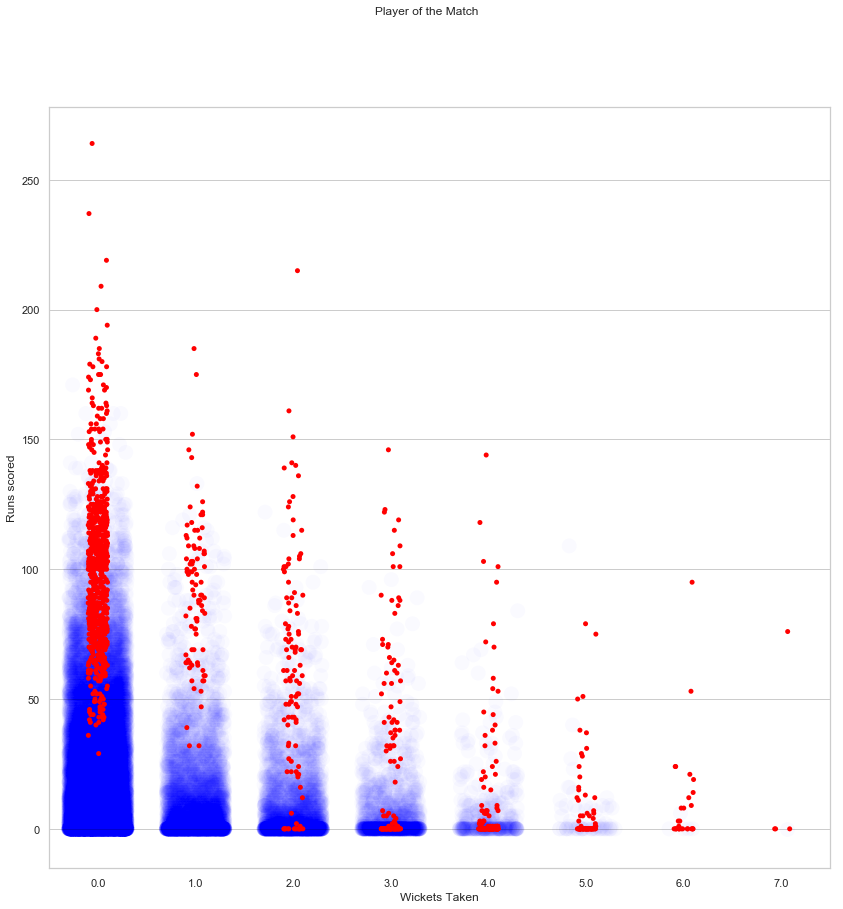

In [28]:
####Find out steve smith home vs away average####

smith = batting_stats.loc[batting_stats['batsman'] == 'SPD Smith']
location = match_information[['match_id','home_team','away_team']]

#join the smith dataframe to the match information dataframe on match id

smith = pd.merge(smith, location, how='left', on='match_id')

smith_home = smith.loc[smith['home_team']=='Australia']
smith_away = smith.loc[smith['away_team']=='Australia']

smith_home_average = smith_home['runs'].sum() / smith_home['out'].sum()
smith_away_average = smith_away['runs'].sum() / smith_away['out'].sum()

print('Steve Smiths average for home matches is {:.2f} and for away matches is {:.2f}\n'.format(smith_home_average,smith_away_average))






####How many players have scored a century and had a 5 wicket innings in a single match?####

#join batting_stats and bowling_stats on match_id and player name

batt = batting_stats[['batsman','runs','innings','match_id']]
bowl = bowling_stats[['bowler','innings','wickets','match_id']]

#join batt and bowl dataframes
batt_bowl = pd.merge(batt, bowl, how='outer', left_on = ['match_id','batsman'], right_on=['match_id','bowler'])
#note: Because we do not join on innings each combination of batting innings and bowling innings 
#is produced. Eg for a batter / bowler who performs in all 4 innings the possible combinations are
# bat 1 / bowl 1, bat 1 / bowl 2, bat 2 / bowl 1, bat 2 / bowl 2. 
#This would cause problems if aggregating for averages, but here it allows us to simply search
#row by row for any entries with 100 runs AND 5 wickets.

#find all players who have scored a century
x = batt_bowl.loc[batt_bowl['runs'] >= 100]
#of those players reduce to those who also took a 5 wicket haul
x = x.loc[x['wickets'] >= 5]
# display the results (number of results is small enough for direct inspection)

print('Players who have scored 100 runs and taken 5 wickets')
display(x)
      
####How often does a player who takes 10 wickets in a match recieve the man of the match award?#

#sum the wickets taken by each bowler across both innings for each match
wickets_per_match = bowling_stats[['match_id','bowler','wickets']].groupby(['match_id','bowler']).agg('sum')

#filter out only those bowlers who have taken at least 10 wickets
five_wickets = wickets_per_match.loc[wickets_per_match['wickets'] >= 5]
five_wickets.reset_index(inplace=True)
total_takers = five_wickets.shape[0]
print('There have been {:d} players who have taken 5 wickets in a match.'.format(total_takers))

#calculate the number of these players who received the player of the match award.
#join ten_wickets to match_information


pom = match_information[['match_id','player_of_match','player_of_match_2']]
five_wickets = pd.merge(five_wickets, pom, how='left', on='match_id')

#filter to find the number of times taking 10 wickets led to receiving player of the match
x = five_wickets[five_wickets.bowler == five_wickets.player_of_match]
y = five_wickets[five_wickets.bowler == five_wickets.player_of_match_2]
x = x.shape[0]
y = y.shape[0]

total_winners = x+y

print('Of these {:d} (or {:.2f}%) went on to be awarded the player of the match.'.format(total_winners,100*total_winners/total_takers))






#### Combine all datasets and plot distribution of player of the match in terms of player_stats

batting_runs = batting_stats[['match_id','batsman','runs']]
bowling_wickets = bowling_stats[['match_id','bowler','wickets']]
player_of_match = match_information[['match_id','player_of_match','player_of_match_2']]

#need to aggregate total runs and total wickers for each player for each match

bowling_wickets = bowling_wickets[['match_id','bowler','wickets']].groupby(['match_id','bowler']).agg('sum')
bowling_wickets.reset_index(inplace=True)
batting_runs = batting_runs[['match_id','batsman','runs']].groupby(['match_id','batsman']).agg('sum')
batting_runs.reset_index(inplace=True)

player_stats = pd.merge(bowling_wickets, batting_runs, how='outer', left_on=['match_id','bowler'], right_on=['match_id','batsman'])

#want to generate a list of all players in all matches, and assign a boolean column 'POM' == 1
#if the player is the player of the match

player_stats = pd.merge(player_stats, player_of_match, how='left', on=['match_id'])
#fill nan values
display(player_stats.head())
player_stats['bowler'] = player_stats['bowler'].fillna(player_stats['batsman']) #for when a bowler does not bat
player_stats['batsman'] = player_stats['batsman'].fillna(player_stats['bowler']) #for when a batsman does not bowl
player_stats = player_stats.fillna(0) #fill all other results as zero

player_stats['POM'] = (player_stats.batsman == player_stats.player_of_match) | (player_stats.batsman == player_stats.player_of_match_2)

pom = player_stats.loc[player_stats['POM'] == True]
npom = player_stats.loc[player_stats['POM'] == False]

#generate a scatter plot with x axis number of runs and y axis number of wickets
# set hue to POM 


# may want to create a density type plot instead for non-pom and overlay pom?



#plot a scatterplot of this result
fig, ax6 = plt.subplots(1,1, figsize=(14,14))
sns.stripplot(x = 'wickets', y = 'runs', data=npom,color='blue', alpha=0.02, jitter=0.3, s=15) #s=3, alpha=0.3
sns.stripplot(x = 'wickets', y = 'runs',color='red', data=pom, alpha=1, jitter=True)
#sns.boxplot(x = 'wickets', y = 'runs', data=npom)
fig.suptitle('Player of the Match')
plt.xlabel('Wickets Taken')
plt.ylabel('Runs scored')


## 6 Runs and Wickets by overs



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


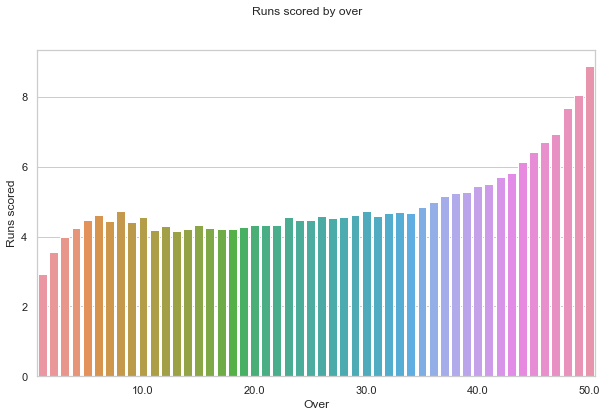

An average of 129.67 runs are scored in the first 30 overs.
An average of 117.50 runs are scored in the last 20 overs


In [99]:
# ball_by_ball stats contains a breakdown of each ball in each match

ball_by_ball_stats.columns

runs_per_over = ball_by_ball_stats[['over','runs']]
runs_per_over['over'] = runs_per_over['over'].apply(np.floor) + 1 
runs_per_over = runs_per_over.groupby('over').agg('mean') * 6 #6 balls in an over
runs_per_over.reset_index(inplace=True)
runs_per_over['over'] = runs_per_over.over.astype('float')

#plot a bar graph of the run rate per over
fig, ax = plt.subplots(1,1, figsize=(10,6))
plot = sns.barplot(x='over',y='runs',data=runs_per_over, ax=ax)
#set xticks
for label in plot.get_xticklabels():
    
    if np.float(label.get_text()) % 10 == 0:  
        label.set_visible(True)
    else:
        label.set_visible(False)   
#set labels
fig.suptitle('Runs scored by over')
plt.xlabel('Over')
plt.ylabel('Runs scored')
#show plot
plt.show()

runs_f30 = runs_per_over.loc[runs_per_over['over'] <= 30, 'runs'].sum()
runs_l20 = runs_per_over.loc[runs_per_over['over'] >30, 'runs'].sum()

print('An average of {:.2f} runs are scored in the first 30 overs.'.format(runs_f30))
print('An average of {:.2f} runs are scored in the last 20 overs'.format(runs_l20))


#### Remarks

We can see that the run rate increases dramatically towards the end of matches. This is becase teams no longer have to conserve wickets and are more free to play risky shots. Almost the same number of runs are scored in the last 20 overs as there are in the first 30. 

Note that this is average does not take into account the number of wickets in hand. As such a team which has lost few wickets, and has recognised batsmen at the crease, may well score more runs in the final 20 overs than in the first. Conversely a team which only has a few wickets in hand may struggle to score many runs. 

There is also a small crest in run rate just before the ten over mark, and then a slight reduction in strike rate during overs 10-20. This is likely due to the first ten overs being in a 'power play' period. In this period there are fielding restrictions which encourage more aggressive run scoring.

A more sophisticated analysis is needed to provide better insights into run rate against over number. The results shown here are just a simple illustration of the broad trend.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


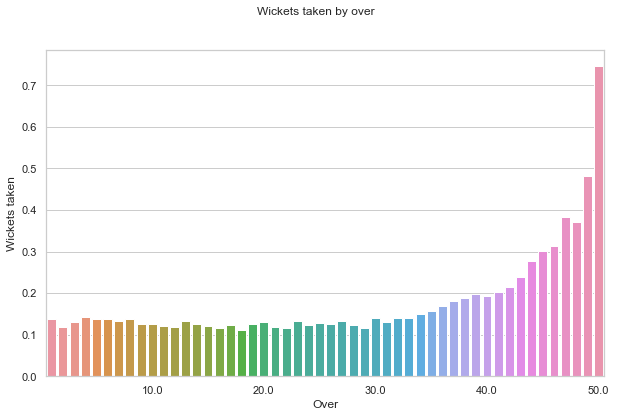

In [98]:
# ball_by_ball stats contains a breakdown of each ball in each match

ball_by_ball_stats.columns

wickets_by_over = ball_by_ball_stats[['over','dismissal_type']]
wickets_by_over['wickets'] = wickets_by_over['dismissal_type'].notna()
wickets_by_over.loc[:,'over'] = wickets_by_over.over.apply(np.floor) + 1
wickets_by_over = wickets_by_over.groupby('over').agg('mean') * 6 # 6 balls in an over
wickets_by_over.reset_index(inplace=True)


# runs_per_over['over'] = runs_per_over['over'].apply(np.floor) + 1 
# runs_per_over = runs_per_over.groupby('over').agg('mean') * 6 #6 balls in an over
# runs_per_over.reset_index(inplace=True)
# runs_per_over['over'] = runs_per_over.over.astype('float')








#plot a bar graph of the run rate per over
fig, ax = plt.subplots(1,1, figsize=(10,6))
plot = sns.barplot(x='over',y='wickets',data=wickets_by_over, ax=ax)
#set xticks
for label in plot.get_xticklabels():
    
    if np.float(label.get_text()) % 10 == 0:  
        label.set_visible(True)
    else:
        label.set_visible(False)   
#set labels
fig.suptitle('Wickets taken by over')
plt.xlabel('Over')
plt.ylabel('Wickets taken')
#show plot
plt.show()

# runs_f30 = runs_per_over.loc[runs_per_over['over'] <= 30, 'runs'].sum()
# runs_l20 = runs_per_over.loc[runs_per_over['over'] >30, 'runs'].sum()

# print('An average of {:.2f} runs are scored in the first 30 overs.'.format(runs_f30))
# print('An average of {:.2f} runs are scored in the last 20 overs'.format(runs_l20))


#### Remarks

We can see that the number of wickets which are taken in any given over is around 0.15 for the first 30 overs. After that the number of wickets taken each over increases, with a very streep increase in the last two overs.

The increase in the wicket taking rate can be attributed to two factors. The first is that the quality of batsmen generally decreases as more wickets are taken. Late in the match poorer batsmen may be at the crease, and these batsmen are more likely to be given out. Secondly batsmen are encouraged to be very aggressive in the final few overs. This is because they do not need to preserve their wicket as much. As seen in the previous subsection there is also an increase in the runs scored in the final few overs.

Distinguishing between these two factors and extracting other trends within the data requires a more complex analysis of the data. The plot produced here gives only an indication of the broad trend throughout a match.

### 6.1 Results

Steve Smith has a better batting average at away grounds than home grounds. This could be due to several factors. Firstly Australian grounds may be lower scoring compared to international grounds. Secondly Smiths batting average was relatively low until around his 40th innings, and many of these games may have been played at home. If his batting performance increased over time the high number of local games early in his career could skew his home/away average. Finally variations with the oppposing team may play a part. If more difficult teams have been playing in Australia, while Australia has been playing more easier teams overseas, this could also affect the average. More investigation could try and uncover the underlying reason behind this descrepancy.

The next task was finding the number of players who took 5 wickets in an innings and scored 100 runs in an innings during the same match. This was accomplished using a relatively straightforward join between batting and bowling datasets, making sure to correctly use an OUTER join type.

Finding the number of players taking 10 wickets in a match required grouping by match and player and then aggregating over the number of wickets taken. Once this was achieved a join was made to the match_information dataframe and the bowlers were compared to the player of the match winners.

Finally I have produced a plot of wickets and runs by an individual in a match. Player of the match is highlighted in red. As you would expect the majority of the player of the match awards are given to batsmen with high combined scores or to bowlers with high wickets taken. There appears to be a tradeoff between the number of runs scored and the number of wickets taken, allowing allrounders with solid batting and bowling to compete for player of the match. 

Keep in mind that a player with an excellent score may not be awarded player of the match because another player has exceeded them in that same match. By the same token a player with a relatively modest performance may be awarded player of the match if no other players had an excellent game. Determining the liklihood that a player is awarded man of the match for their performance may be a good topic for machine learning using a classification algorithm. A boundary between the two classes (man of the match or not) can then be drawn. A mismatched player can then consider themselves lucky or unlucky to receive or not receive player of the match.

## 7. Summary

This project has investigated some simple relationships between match, batting, and bowling statistics and their interplay. This project was intended as a demonstration only and more complex and sophisticated relationships can be evaluated.